In [1]:
##############################################################################################################
# DESCRIPTION: 
#              
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 70 # 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mae_nz'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-64-unet-d2"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelB as train
import ReportsK as reports
import UnetI as model_factory

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7105761867099627030
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5722079232
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10457595005853115511
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
##################
# MODEL DEFINITION
##################

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Loss=<function mae_nz at 0x0000023F677C7AF0>
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
_________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [6]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:8786
Nitid files:8786
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2309
Nitid files:2309


In [7]:
##################
# TRAIN MODEL
##################
hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Epoch 1/70
550/550 [==============================] - 29s 37ms/step - loss: 0.0051 - val_loss: 0.0037
Epoch 2/70
550/550 [==============================] - 19s 35ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 3/70
550/550 [==============================] - 19s 35ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 4/70
550/550 [==============================] - 19s 35ms/step - loss: 0.0017 - val_loss: 0.0026
Epoch 5/70
550/550 [==============================] - 19s 35ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 6/70
550/550 [==============================] - 19s 35ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 7/70
550/550 [==============================] - 19s 35ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 8/70
550/550 [==============================] - 19s 35ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 9/70
550/550 [==============================] - 19s 35ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 10/70
550/550 [==============================] - 19s 35ms/step - loss: 0.001

In [8]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2309
Best RMSENZ  =2189 (0.95)
Best MAENZ   =2190 (0.95)
Best Accuracy=2060 (0.89)
RMSE-NZ  Pred=0.0243  Noisy=0.0943
MAE-NZ   Pred=0.0208  Noisy=0.0904
PSNR     Pred=20.0 dB Noisy=9.3 dB
Accuracy Pred=0.37    Noisy=0.09
SSM      Pred=0.95    Noisy=0.68
HOG MSE  Pred=0.08    Noisy=0.12


Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test/
Noisy files:120
Nitid files:120
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_0_nitid_idx134.tif


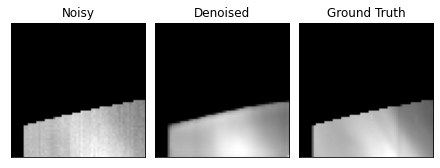

RMSE-NZ  Pred=0.0111  Noisy=0.1136 BEST
MAE-NZ   Pred=0.0054  Noisy=0.1102 BEST
PSNR     Pred=25.5 dB Noisy=5.3 dB BEST
Accuracy Pred=0.75    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.78
HOG MSE  Pred=0.10    Noisy=0.08
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_10_nitid_idx134.tif


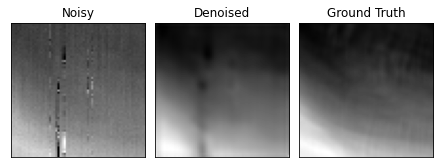

RMSE-NZ  Pred=0.0149  Noisy=0.1361 BEST
MAE-NZ   Pred=0.0124  Noisy=0.1225 BEST
PSNR     Pred=27.4 dB Noisy=8.2 dB BEST
Accuracy Pred=0.41    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.39
HOG MSE  Pred=0.05    Noisy=0.15
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_11_nitid_idx134.tif


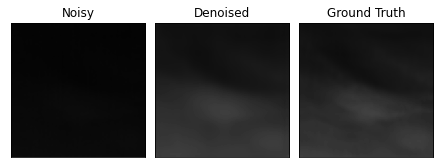

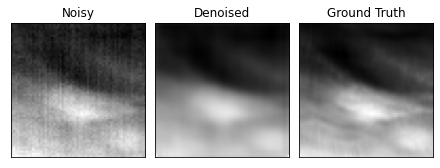

RMSE-NZ  Pred=0.0087  Noisy=0.1187 BEST
MAE-NZ   Pred=0.0067  Noisy=0.1077 BEST
PSNR     Pred=29.5 dB Noisy=6.8 dB BEST
Accuracy Pred=0.76    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.42
HOG MSE  Pred=0.03    Noisy=0.08
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_12_nitid_idx134.tif


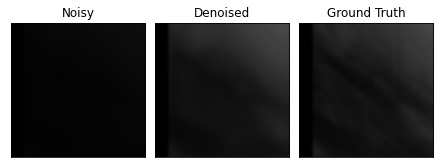

RMSE-NZ  Pred=0.0119  Noisy=0.0947 BEST
MAE-NZ   Pred=0.0092  Noisy=0.0830 BEST
PSNR     Pred=28.1 dB Noisy=10.1 dB BEST
Accuracy Pred=0.60    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.42
HOG MSE  Pred=0.05    Noisy=0.07
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_13_nitid_idx134.tif


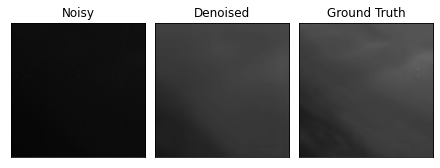

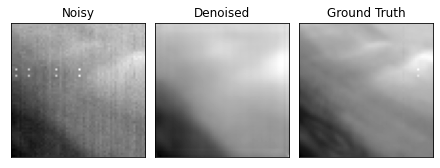

RMSE-NZ  Pred=0.0372  Noisy=0.2117 BEST
MAE-NZ   Pred=0.0332  Noisy=0.2063 BEST
PSNR     Pred=20.5 dB Noisy=5.4 dB BEST
Accuracy Pred=0.05    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.41
HOG MSE  Pred=0.04    Noisy=0.20
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_14_nitid_idx134.tif


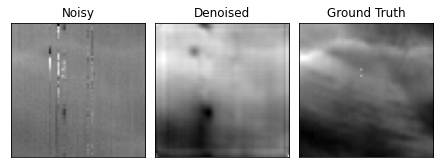

RMSE-NZ  Pred=0.0514  Noisy=0.2330 BEST
MAE-NZ   Pred=0.0484  Noisy=0.2317 BEST
PSNR     Pred=17.6 dB Noisy=4.5 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.44
HOG MSE  Pred=0.07    Noisy=0.10
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_15_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_15_nitid_idx134.tif


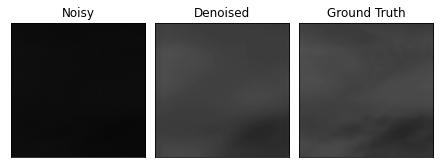

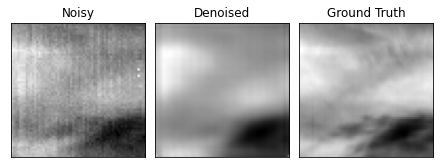

RMSE-NZ  Pred=0.0141  Noisy=0.2065 BEST
MAE-NZ   Pred=0.0114  Noisy=0.2048 BEST
PSNR     Pred=26.9 dB Noisy=3.6 dB BEST
Accuracy Pred=0.51    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.37
HOG MSE  Pred=0.04    Noisy=0.11
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_1_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_1_nitid_idx134.tif


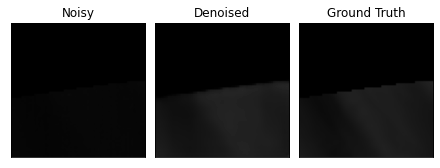

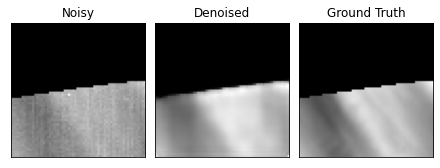

RMSE-NZ  Pred=0.0108  Noisy=0.0697 BEST
MAE-NZ   Pred=0.0071  Noisy=0.0669 BEST
PSNR     Pred=22.6 dB Noisy=6.4 dB BEST
Accuracy Pred=0.60    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.72
HOG MSE  Pred=0.09    Noisy=0.06
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_2_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_2_nitid_idx134.tif


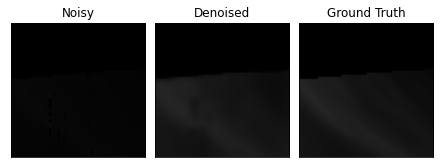

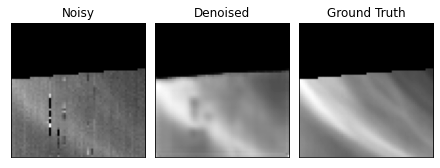

RMSE-NZ  Pred=0.0080  Noisy=0.0660 BEST
MAE-NZ   Pred=0.0048  Noisy=0.0626 BEST
PSNR     Pred=25.4 dB Noisy=7.1 dB BEST
Accuracy Pred=0.83    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.68
HOG MSE  Pred=0.10    Noisy=0.10
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_3_nitid_idx134.tif


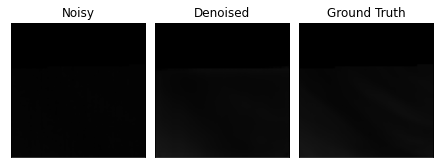

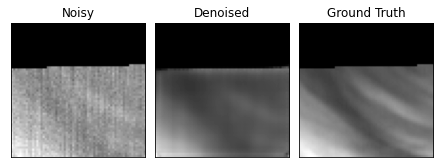

RMSE-NZ  Pred=0.0055  Noisy=0.0283 BEST
MAE-NZ   Pred=0.0032  Noisy=0.0260 BEST
PSNR     Pred=24.3 dB Noisy=10.1 dB BEST
Accuracy Pred=0.93    Noisy=0.01 BEST
SSM      Pred=0.98    Noisy=0.80
HOG MSE  Pred=0.09    Noisy=0.13
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_4_nitid_idx134.tif


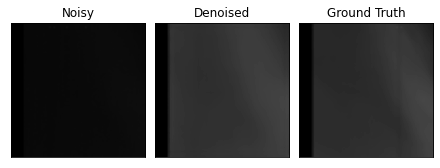

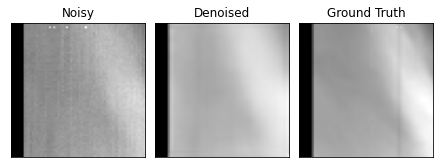

RMSE-NZ  Pred=0.0208  Noisy=0.1519 BEST
MAE-NZ   Pred=0.0178  Noisy=0.1492 BEST
PSNR     Pred=22.4 dB Noisy=5.1 dB BEST
Accuracy Pred=0.22    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.32
HOG MSE  Pred=0.04    Noisy=0.06
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_5_nitid_idx134.tif


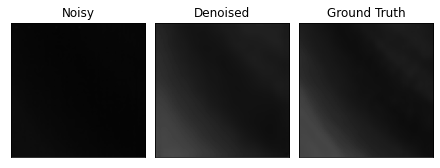

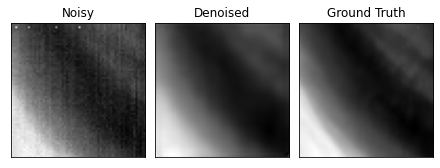

RMSE-NZ  Pred=0.0137  Noisy=0.0993 BEST
MAE-NZ   Pred=0.0123  Noisy=0.0857 BEST
PSNR     Pred=26.3 dB Noisy=9.1 dB BEST
Accuracy Pred=0.35    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.41
HOG MSE  Pred=0.01    Noisy=0.26
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_6_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_6_nitid_idx134.tif


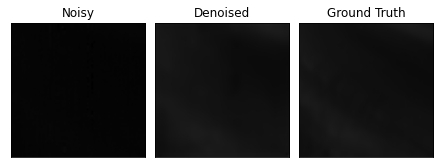

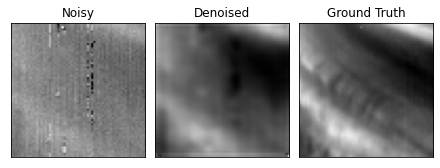

RMSE-NZ  Pred=0.0062  Noisy=0.0521 BEST
MAE-NZ   Pred=0.0048  Noisy=0.0506 BEST
PSNR     Pred=25.3 dB Noisy=6.8 dB BEST
Accuracy Pred=0.89    Noisy=0.00 BEST
SSM      Pred=0.99    Noisy=0.50
HOG MSE  Pred=0.05    Noisy=0.14
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_7_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_7_nitid_idx134.tif


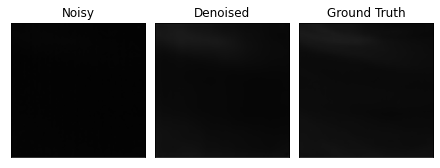

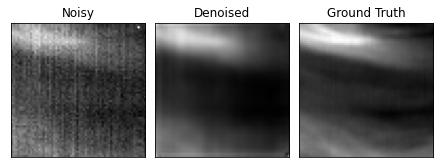

RMSE-NZ  Pred=0.0092  Noisy=0.0408 BEST
MAE-NZ   Pred=0.0083  Noisy=0.0387 BEST
PSNR     Pred=21.6 dB Noisy=8.7 dB BEST
Accuracy Pred=0.63    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.64
HOG MSE  Pred=0.03    Noisy=0.36
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_8_nitid_idx134.tif


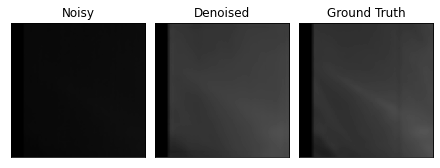

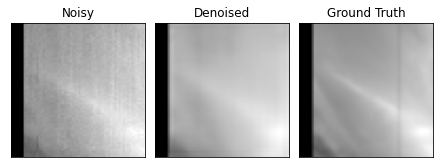

RMSE-NZ  Pred=0.0142  Noisy=0.1798 BEST
MAE-NZ   Pred=0.0119  Noisy=0.1769 BEST
PSNR     Pred=27.4 dB Noisy=5.3 dB BEST
Accuracy Pred=0.40    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.32
HOG MSE  Pred=0.03    Noisy=0.04
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_9_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0112_01_02_9_nitid_idx134.tif


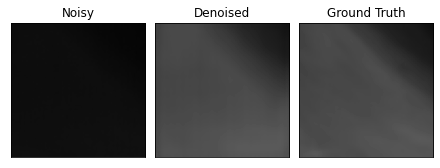

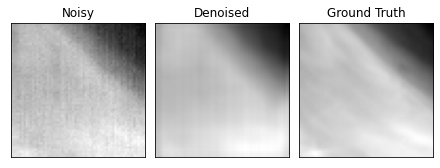

RMSE-NZ  Pred=0.0100  Noisy=0.2214 BEST
MAE-NZ   Pred=0.0078  Noisy=0.2154 BEST
PSNR     Pred=30.8 dB Noisy=4.0 dB BEST
Accuracy Pred=0.69    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.35
HOG MSE  Pred=0.04    Noisy=0.18
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_10_nitid_idx134.tif


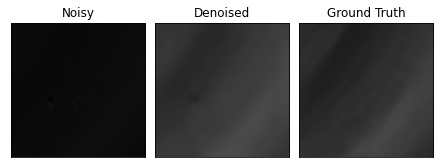

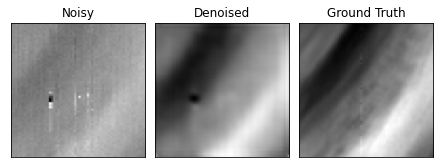

RMSE-NZ  Pred=0.0339  Noisy=0.1492 BEST
MAE-NZ   Pred=0.0326  Noisy=0.1449 BEST
PSNR     Pred=18.4 dB Noisy=5.5 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.36
HOG MSE  Pred=0.04    Noisy=0.23
******************************************************
Index:17
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_11_nitid_idx134.tif


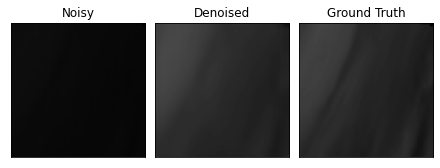

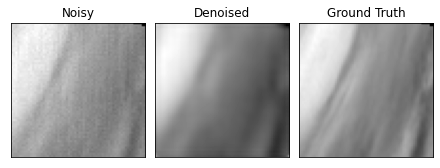

RMSE-NZ  Pred=0.0167  Noisy=0.1327 BEST
MAE-NZ   Pred=0.0141  Noisy=0.1279 BEST
PSNR     Pred=24.1 dB Noisy=6.1 dB BEST
Accuracy Pred=0.35    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.37
HOG MSE  Pred=0.03    Noisy=0.11
******************************************************
Index:18
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_12_nitid_idx134.tif


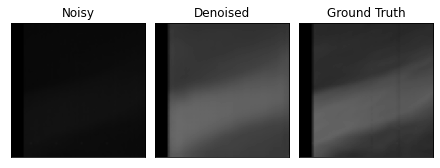

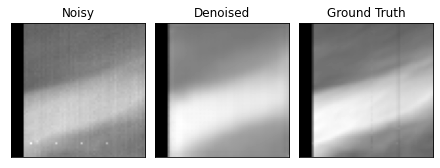

RMSE-NZ  Pred=0.0344  Noisy=0.2079 BEST
MAE-NZ   Pred=0.0303  Noisy=0.1967 BEST
PSNR     Pred=21.3 dB Noisy=5.6 dB BEST
Accuracy Pred=0.14    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.31
HOG MSE  Pred=0.03    Noisy=0.05
******************************************************
Index:19
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_13_nitid_idx134.tif


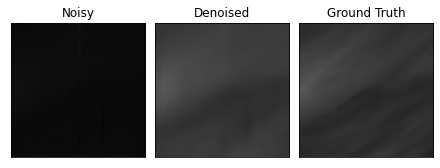

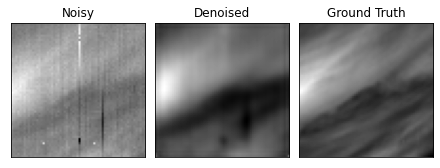

RMSE-NZ  Pred=0.0302  Noisy=0.1641 BEST
MAE-NZ   Pred=0.0277  Noisy=0.1609 BEST
PSNR     Pred=21.4 dB Noisy=6.7 dB BEST
Accuracy Pred=0.05    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.36
HOG MSE  Pred=0.06    Noisy=0.17
******************************************************
Index:20
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_14_nitid_idx134.tif


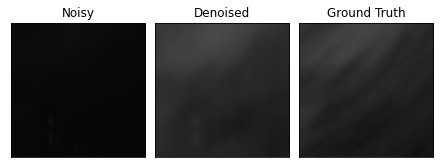

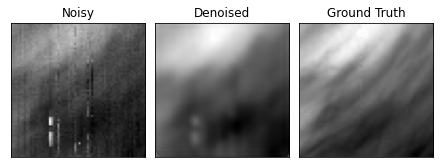

RMSE-NZ  Pred=0.0222  Noisy=0.1256 BEST
MAE-NZ   Pred=0.0190  Noisy=0.1186 BEST
PSNR     Pred=21.7 dB Noisy=6.7 dB BEST
Accuracy Pred=0.21    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.38
HOG MSE  Pred=0.06    Noisy=0.13
******************************************************
Index:21
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_15_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_15_nitid_idx134.tif


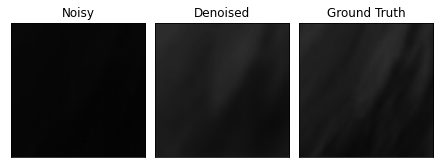

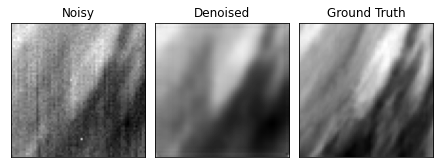

RMSE-NZ  Pred=0.0130  Noisy=0.0827 BEST
MAE-NZ   Pred=0.0105  Noisy=0.0778 BEST
PSNR     Pred=22.7 dB Noisy=6.6 dB BEST
Accuracy Pred=0.54    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.44
HOG MSE  Pred=0.06    Noisy=0.10
******************************************************
Index:22
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_4_nitid_idx134.tif


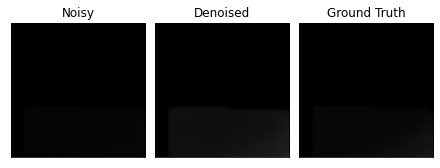

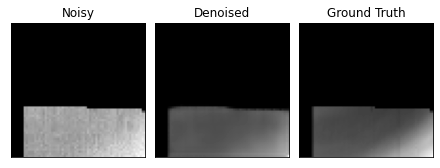

RMSE-NZ  Pred=0.0186  Noisy=0.0204 BEST
MAE-NZ   Pred=0.0106  Noisy=0.0165 BEST
PSNR     Pred=14.5 dB Noisy=13.6 dB BEST
Accuracy Pred=0.67    Noisy=0.33 BEST
SSM      Pred=0.93    Noisy=0.83
HOG MSE  Pred=0.07    Noisy=0.08
******************************************************
Index:23
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_5_nitid_idx134.tif


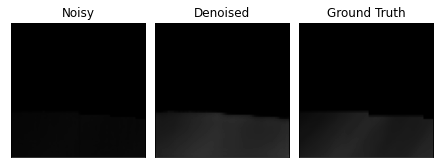

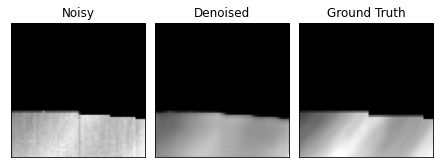

RMSE-NZ  Pred=0.0195  Noisy=0.0755 BEST
MAE-NZ   Pred=0.0108  Noisy=0.0658 BEST
PSNR     Pred=18.3 dB Noisy=6.6 dB BEST
Accuracy Pred=0.68    Noisy=0.18 BEST
SSM      Pred=0.98    Noisy=0.81
HOG MSE  Pred=0.08    Noisy=0.06
******************************************************
Index:24
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_6_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_6_nitid_idx134.tif


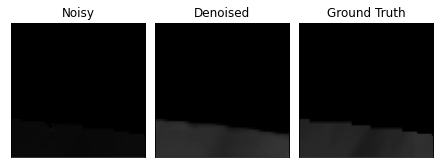

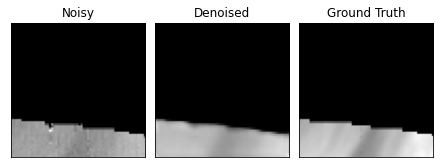

RMSE-NZ  Pred=0.0147  Noisy=0.0947 BEST
MAE-NZ   Pred=0.0065  Noisy=0.0790 BEST
PSNR     Pred=22.7 dB Noisy=6.5 dB BEST
Accuracy Pred=0.78    Noisy=0.27 BEST
SSM      Pred=0.98    Noisy=0.85
HOG MSE  Pred=0.08    Noisy=0.09
******************************************************
Index:25
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_7_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_7_nitid_idx134.tif


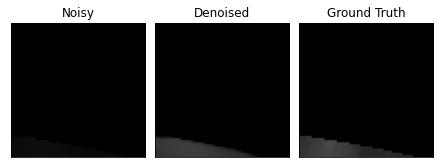

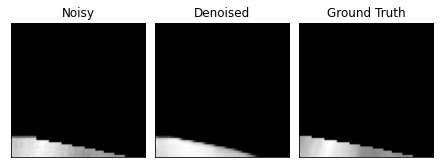

RMSE-NZ  Pred=0.0136  Noisy=0.0953 BEST
MAE-NZ   Pred=0.0026  Noisy=0.0526 BEST
PSNR     Pred=26.3 dB Noisy=9.3 dB BEST
Accuracy Pred=0.94    Noisy=0.68 BEST
SSM      Pred=0.98    Noisy=0.94
HOG MSE  Pred=0.10    Noisy=0.16
******************************************************
Index:26
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_8_nitid_idx134.tif


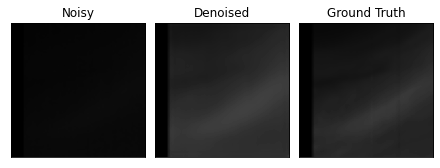

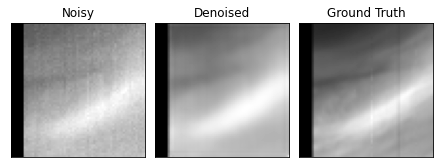

RMSE-NZ  Pred=0.0400  Noisy=0.1034 BEST
MAE-NZ   Pred=0.0376  Noisy=0.0952 BEST
PSNR     Pred=15.2 dB Noisy=6.9 dB BEST
Accuracy Pred=0.09    Noisy=0.00 BEST
SSM      Pred=0.92    Noisy=0.34
HOG MSE  Pred=0.04    Noisy=0.07
******************************************************
Index:27
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_9_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0127_01_02_9_nitid_idx134.tif


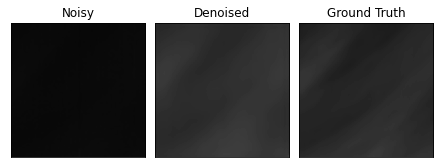

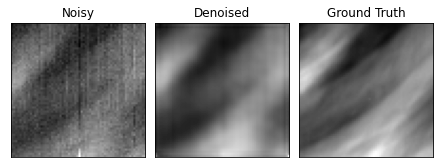

RMSE-NZ  Pred=0.0323  Noisy=0.1236 BEST
MAE-NZ   Pred=0.0315  Noisy=0.1221 BEST
PSNR     Pred=16.9 dB Noisy=5.3 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.37
HOG MSE  Pred=0.05    Noisy=0.28
******************************************************
Index:28
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_10_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_10_nitid_idx146.tif


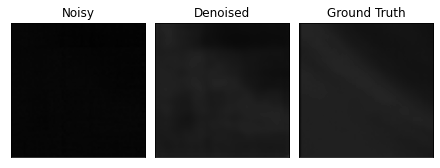

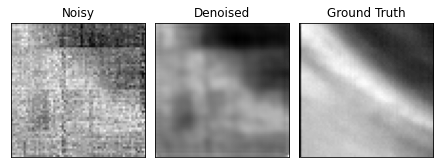

RMSE-NZ  Pred=0.0185  Noisy=0.0917 BEST
MAE-NZ   Pred=0.0148  Noisy=0.0895 BEST
PSNR     Pred=18.0 dB Noisy=4.1 dB BEST
Accuracy Pred=0.41    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.43
HOG MSE  Pred=0.08    Noisy=0.27
******************************************************
Index:29
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_11_nitid_idx146.tif


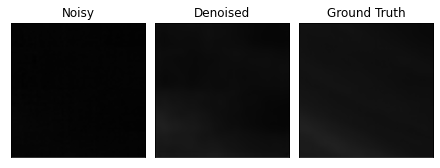

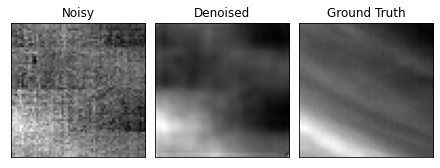

RMSE-NZ  Pred=0.0190  Noisy=0.0568 BEST
MAE-NZ   Pred=0.0166  Noisy=0.0547 BEST
PSNR     Pred=16.7 dB Noisy=7.2 dB BEST
Accuracy Pred=0.25    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.58
HOG MSE  Pred=0.07    Noisy=0.30
******************************************************
Index:30
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_12_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_12_nitid_idx146.tif


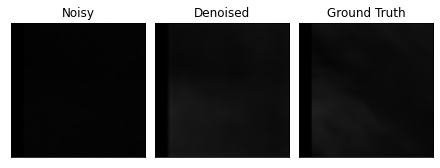

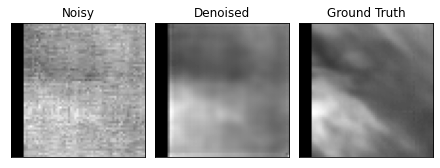

RMSE-NZ  Pred=0.0114  Noisy=0.0419 BEST
MAE-NZ   Pred=0.0082  Noisy=0.0386 BEST
PSNR     Pred=20.4 dB Noisy=9.1 dB BEST
Accuracy Pred=0.67    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.54
HOG MSE  Pred=0.05    Noisy=0.05
******************************************************
Index:31
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_13_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_13_nitid_idx146.tif


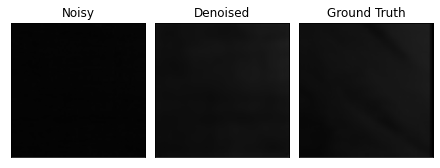

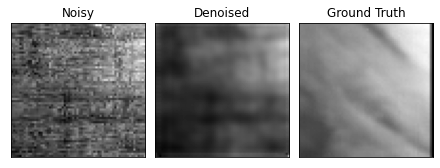

RMSE-NZ  Pred=0.0163  Noisy=0.0543 BEST
MAE-NZ   Pred=0.0100  Noisy=0.0511 BEST
PSNR     Pred=17.5 dB Noisy=7.0 dB BEST
Accuracy Pred=0.63    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.52
HOG MSE  Pred=0.14    Noisy=0.33
******************************************************
Index:32
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_14_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_14_nitid_idx146.tif


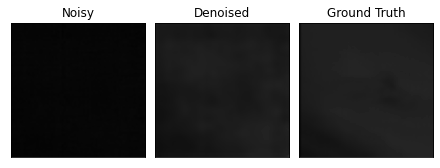

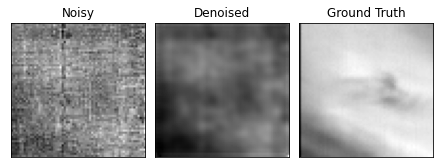

RMSE-NZ  Pred=0.0213  Noisy=0.1004 BEST
MAE-NZ   Pred=0.0196  Noisy=0.0990 BEST
PSNR     Pred=16.8 dB Noisy=3.3 dB BEST
Accuracy Pred=0.12    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.43
HOG MSE  Pred=0.17    Noisy=0.25
******************************************************
Index:33
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_15_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_15_nitid_idx146.tif


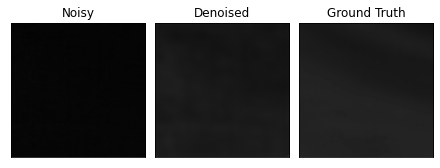

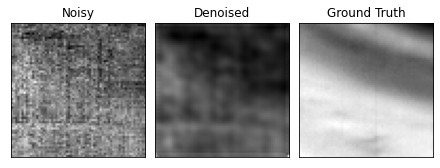

RMSE-NZ  Pred=0.0252  Noisy=0.0982 BEST
MAE-NZ   Pred=0.0234  Noisy=0.0968 BEST
PSNR     Pred=15.2 dB Noisy=3.4 dB BEST
Accuracy Pred=0.08    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.45
HOG MSE  Pred=0.17    Noisy=0.31
******************************************************
Index:34
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_4_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_4_nitid_idx146.tif


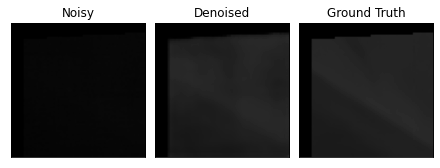

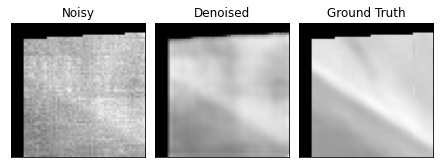

RMSE-NZ  Pred=0.0129  Noisy=0.1114 BEST
MAE-NZ   Pred=0.0086  Noisy=0.1105 BEST
PSNR     Pred=22.4 dB Noisy=3.7 dB BEST
Accuracy Pred=0.65    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.43
HOG MSE  Pred=0.06    Noisy=0.10
******************************************************
Index:35
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_5_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_5_nitid_idx146.tif


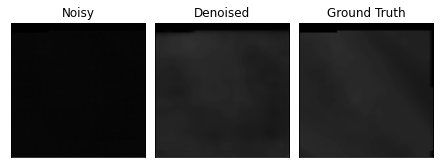

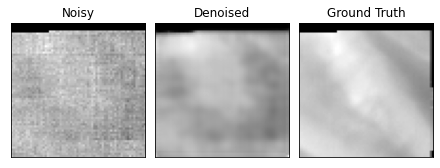

RMSE-NZ  Pred=0.0193  Noisy=0.1116 BEST
MAE-NZ   Pred=0.0120  Noisy=0.1102 BEST
PSNR     Pred=19.3 dB Noisy=4.1 dB BEST
Accuracy Pred=0.58    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.42
HOG MSE  Pred=0.05    Noisy=0.06
******************************************************
Index:36
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_6_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_6_nitid_idx146.tif


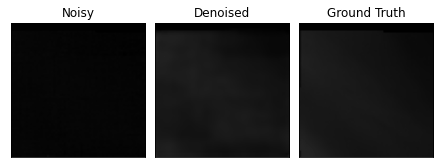

RMSE-NZ  Pred=0.0127  Noisy=0.0653 BEST
MAE-NZ   Pred=0.0099  Noisy=0.0629 BEST
PSNR     Pred=21.1 dB Noisy=6.9 dB BEST
Accuracy Pred=0.54    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.48
HOG MSE  Pred=0.07    Noisy=0.10
******************************************************
Index:37
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_7_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_7_nitid_idx146.tif


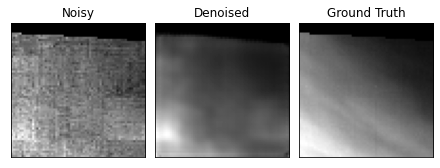

RMSE-NZ  Pred=0.0062  Noisy=0.0247 BEST
MAE-NZ   Pred=0.0047  Noisy=0.0204 BEST
PSNR     Pred=21.8 dB Noisy=9.7 dB BEST
Accuracy Pred=0.90    Noisy=0.28 BEST
SSM      Pred=0.98    Noisy=0.78
HOG MSE  Pred=0.08    Noisy=0.17
******************************************************
Index:38
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_8_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_8_nitid_idx146.tif


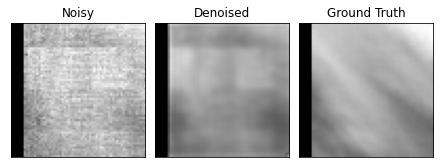

RMSE-NZ  Pred=0.0114  Noisy=0.0695 BEST
MAE-NZ   Pred=0.0084  Noisy=0.0680 BEST
PSNR     Pred=21.3 dB Noisy=5.6 dB BEST
Accuracy Pred=0.65    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.45
HOG MSE  Pred=0.06    Noisy=0.07
******************************************************
Index:39
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_9_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0318_04_03_9_nitid_idx146.tif


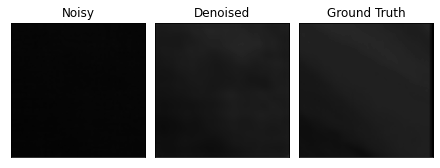

RMSE-NZ  Pred=0.0251  Noisy=0.0930 BEST
MAE-NZ   Pred=0.0203  Noisy=0.0898 BEST
PSNR     Pred=15.8 dB Noisy=4.4 dB BEST
Accuracy Pred=0.19    Noisy=0.00 BEST
SSM      Pred=0.88    Noisy=0.46
HOG MSE  Pred=0.22    Noisy=0.35
******************************************************
Index:40
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_0_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_0_nitid_idx017.tif


RMSE-NZ  Pred=0.0334  Noisy=0.0489 BEST
MAE-NZ   Pred=0.0252  Noisy=0.0477 BEST
PSNR     Pred=18.4 dB Noisy=15.1 dB BEST
Accuracy Pred=0.30    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.92
HOG MSE  Pred=0.09    Noisy=0.03
******************************************************
Index:41
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_10_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_10_nitid_idx017.tif


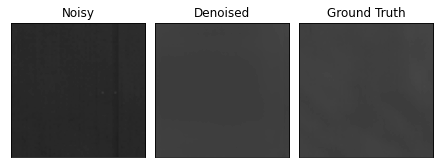

RMSE-NZ  Pred=0.0091  Noisy=0.0894 BEST
MAE-NZ   Pred=0.0073  Noisy=0.0891 BEST
PSNR     Pred=29.6 dB Noisy=9.7 dB BEST
Accuracy Pred=0.74    Noisy=0.00 BEST
SSM      Pred=0.99    Noisy=0.89
HOG MSE  Pred=0.07    Noisy=0.04
******************************************************
Index:42
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_11_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_11_nitid_idx017.tif


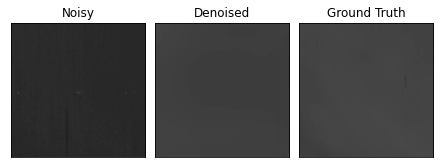

RMSE-NZ  Pred=0.0233  Noisy=0.1032 BEST
MAE-NZ   Pred=0.0219  Noisy=0.1028 BEST
PSNR     Pred=21.7 dB Noisy=8.8 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.90
HOG MSE  Pred=0.06    Noisy=0.04
******************************************************
Index:43
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_12_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_12_nitid_idx017.tif


RMSE-NZ  Pred=0.0384  Noisy=0.0880 BEST
MAE-NZ   Pred=0.0325  Noisy=0.0871 BEST
PSNR     Pred=16.0 dB Noisy=8.8 dB BEST
Accuracy Pred=0.11    Noisy=0.01 BEST
SSM      Pred=0.96    Noisy=0.78
HOG MSE  Pred=0.04    Noisy=0.01
******************************************************
Index:44
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_13_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_13_nitid_idx017.tif


RMSE-NZ  Pred=0.0201  Noisy=0.0869 BEST
MAE-NZ   Pred=0.0184  Noisy=0.0867 BEST
PSNR     Pred=22.2 dB Noisy=9.5 dB BEST
Accuracy Pred=0.14    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.85
HOG MSE  Pred=0.08    Noisy=0.07
******************************************************
Index:45
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_14_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_14_nitid_idx017.tif


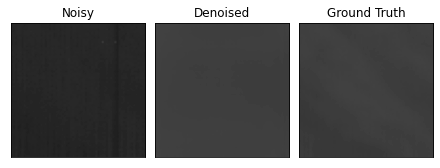

RMSE-NZ  Pred=0.0122  Noisy=0.0931 BEST
MAE-NZ   Pred=0.0090  Noisy=0.0927 BEST
PSNR     Pred=26.5 dB Noisy=8.9 dB BEST
Accuracy Pred=0.70    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.85
HOG MSE  Pred=0.07    Noisy=0.08
******************************************************
Index:46
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_15_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_15_nitid_idx017.tif


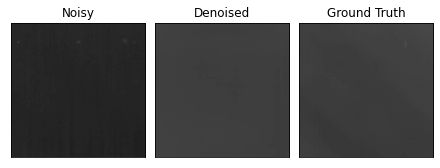

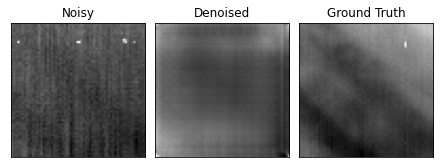

RMSE-NZ  Pred=0.0136  Noisy=0.0962 BEST
MAE-NZ   Pred=0.0115  Noisy=0.0957 BEST
PSNR     Pred=26.8 dB Noisy=9.8 dB BEST
Accuracy Pred=0.48    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.86
HOG MSE  Pred=0.06    Noisy=0.06
******************************************************
Index:47
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_1_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_1_nitid_idx017.tif


RMSE-NZ  Pred=0.0109  Noisy=0.0745 BEST
MAE-NZ   Pred=0.0073  Noisy=0.0741 BEST
PSNR     Pred=29.1 dB Noisy=12.4 dB BEST
Accuracy Pred=0.71    Noisy=0.00 BEST
SSM      Pred=0.99    Noisy=0.93
HOG MSE  Pred=0.16    Noisy=0.04
******************************************************
Index:48
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_2_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_2_nitid_idx017.tif


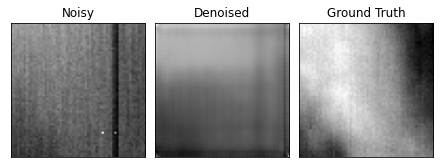

RMSE-NZ  Pred=0.0147  Noisy=0.0755 BEST
MAE-NZ   Pred=0.0105  Noisy=0.0747 BEST
PSNR     Pred=26.3 dB Noisy=12.1 dB BEST
Accuracy Pred=0.63    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.91
HOG MSE  Pred=0.14    Noisy=0.09
******************************************************
Index:49
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_3_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_3_nitid_idx017.tif


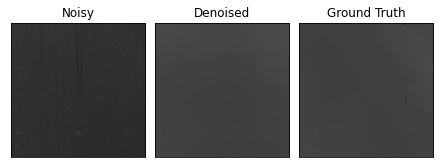

RMSE-NZ  Pred=0.0101  Noisy=0.0707 BEST
MAE-NZ   Pred=0.0074  Noisy=0.0699 BEST
PSNR     Pred=29.6 dB Noisy=12.7 dB BEST
Accuracy Pred=0.77    Noisy=0.00 BEST
SSM      Pred=0.99    Noisy=0.92
HOG MSE  Pred=0.08    Noisy=0.06
******************************************************
Index:50
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_4_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_4_nitid_idx017.tif


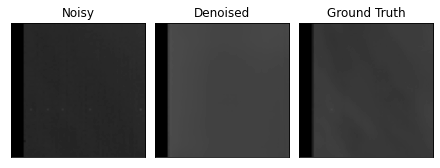

RMSE-NZ  Pred=0.0446  Noisy=0.0687 BEST
MAE-NZ   Pred=0.0390  Noisy=0.0677 BEST
PSNR     Pred=15.8 dB Noisy=12.1 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.84
HOG MSE  Pred=0.05    Noisy=0.02
******************************************************
Index:51
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_5_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_5_nitid_idx017.tif


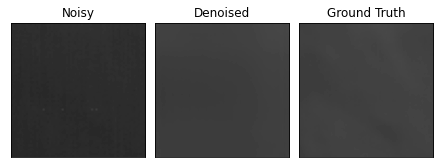

RMSE-NZ  Pred=0.0158  Noisy=0.0829 BEST
MAE-NZ   Pred=0.0144  Noisy=0.0826 BEST
PSNR     Pred=25.1 dB Noisy=10.8 dB BEST
Accuracy Pred=0.26    Noisy=0.00 BEST
SSM      Pred=0.99    Noisy=0.92
HOG MSE  Pred=0.08    Noisy=0.06
******************************************************
Index:52
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_6_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_6_nitid_idx017.tif


RMSE-NZ  Pred=0.0152  Noisy=0.0828 BEST
MAE-NZ   Pred=0.0133  Noisy=0.0822 BEST
PSNR     Pred=25.5 dB Noisy=10.8 dB BEST
Accuracy Pred=0.37    Noisy=0.00 BEST
SSM      Pred=0.99    Noisy=0.91
HOG MSE  Pred=0.08    Noisy=0.09
******************************************************
Index:53
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_7_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_7_nitid_idx017.tif


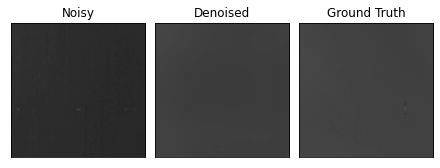

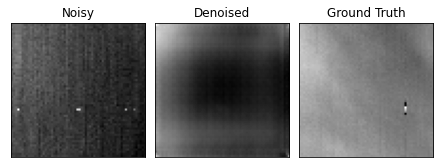

RMSE-NZ  Pred=0.0177  Noisy=0.0876 BEST
MAE-NZ   Pred=0.0163  Noisy=0.0873 BEST
PSNR     Pred=24.5 dB Noisy=10.5 dB BEST
Accuracy Pred=0.19    Noisy=0.00 BEST
SSM      Pred=0.99    Noisy=0.93
HOG MSE  Pred=0.09    Noisy=0.05
******************************************************
Index:54
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_8_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_8_nitid_idx017.tif


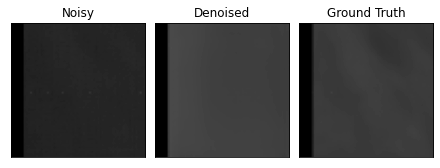

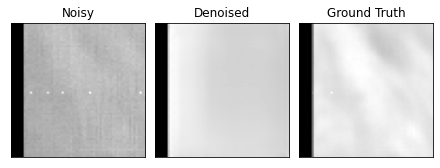

RMSE-NZ  Pred=0.0327  Noisy=0.0860 BEST
MAE-NZ   Pred=0.0248  Noisy=0.0849 BEST
PSNR     Pred=17.7 dB Noisy=9.4 dB BEST
Accuracy Pred=0.26    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.81
HOG MSE  Pred=0.05    Noisy=0.03
******************************************************
Index:55
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_9_noisy_idx014.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_00_9_nitid_idx017.tif


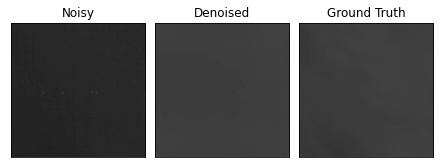

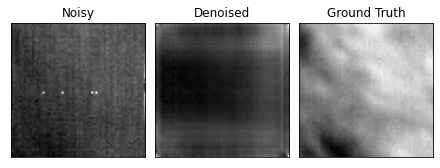

RMSE-NZ  Pred=0.0116  Noisy=0.0877 BEST
MAE-NZ   Pred=0.0087  Noisy=0.0875 BEST
PSNR     Pred=27.2 dB Noisy=9.6 dB BEST
Accuracy Pred=0.71    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.88
HOG MSE  Pred=0.07    Noisy=0.07
******************************************************
Index:56
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_0_nitid_idx134.tif


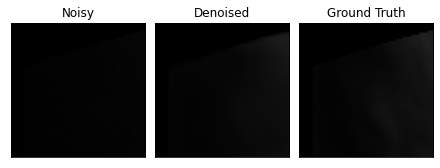

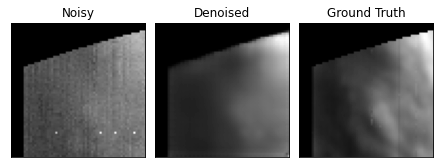

RMSE-NZ  Pred=0.0099  Noisy=0.0359 BEST
MAE-NZ   Pred=0.0062  Noisy=0.0289 BEST
PSNR     Pred=22.1 dB Noisy=10.9 dB BEST
Accuracy Pred=0.76    Noisy=0.24 BEST
SSM      Pred=0.96    Noisy=0.78
HOG MSE  Pred=0.06    Noisy=0.05
******************************************************
Index:57
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_10_nitid_idx134.tif


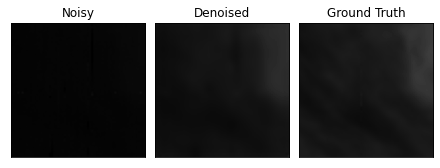

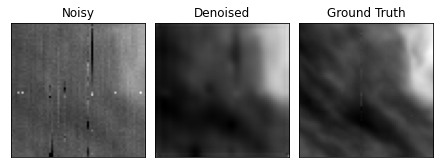

RMSE-NZ  Pred=0.0243  Noisy=0.0889 BEST
MAE-NZ   Pred=0.0222  Noisy=0.0814 BEST
PSNR     Pred=20.1 dB Noisy=8.9 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.48
HOG MSE  Pred=0.05    Noisy=0.08
******************************************************
Index:58
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_11_nitid_idx134.tif


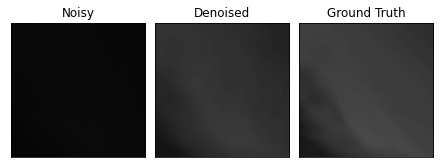

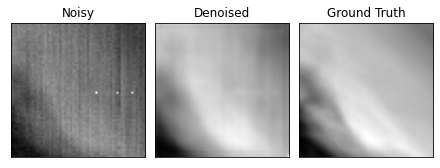

RMSE-NZ  Pred=0.0488  Noisy=0.1963 BEST
MAE-NZ   Pred=0.0477  Noisy=0.1940 BEST
PSNR     Pred=15.5 dB Noisy=3.4 dB BEST
Accuracy Pred=0.01    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.37
HOG MSE  Pred=0.05    Noisy=0.19
******************************************************
Index:59
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_12_nitid_idx134.tif


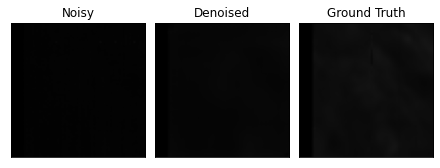

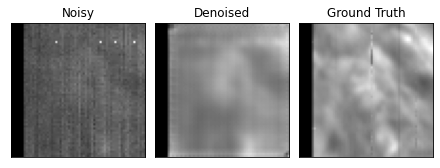

RMSE-NZ  Pred=0.0249  Noisy=0.0402 BEST
MAE-NZ   Pred=0.0229  Noisy=0.0393 BEST
PSNR     Pred=10.7 dB Noisy=6.5 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.80    Noisy=0.80
HOG MSE  Pred=0.03    Noisy=0.02
******************************************************
Index:60
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_13_nitid_idx134.tif


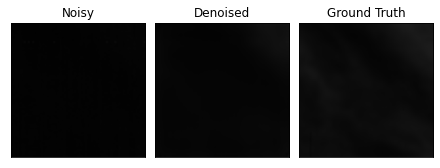

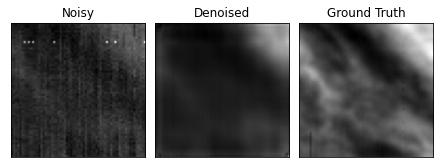

RMSE-NZ  Pred=0.0238  Noisy=0.0387 BEST
MAE-NZ   Pred=0.0220  Noisy=0.0355 BEST
PSNR     Pred=13.5 dB Noisy=9.3 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.83    Noisy=0.81
HOG MSE  Pred=0.06    Noisy=0.14
******************************************************
Index:61
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_14_nitid_idx134.tif


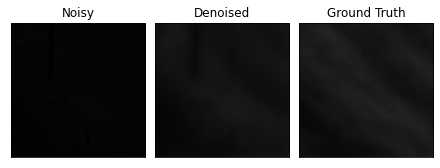

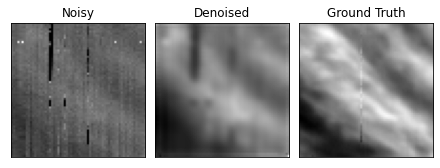

RMSE-NZ  Pred=0.0289  Noisy=0.0755 BEST
MAE-NZ   Pred=0.0262  Noisy=0.0725 BEST
PSNR     Pred=13.8 dB Noisy=5.4 dB BEST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.53
HOG MSE  Pred=0.05    Noisy=0.11
******************************************************
Index:62
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_15_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_15_nitid_idx134.tif


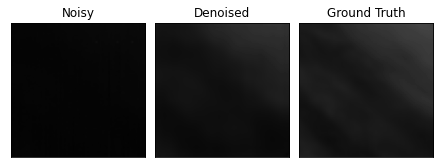

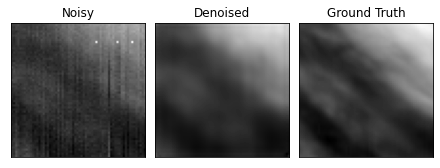

RMSE-NZ  Pred=0.0393  Noisy=0.1075 BEST
MAE-NZ   Pred=0.0377  Noisy=0.0990 BEST
PSNR     Pred=16.8 dB Noisy=8.1 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.50
HOG MSE  Pred=0.06    Noisy=0.18
******************************************************
Index:63
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_1_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_1_nitid_idx134.tif


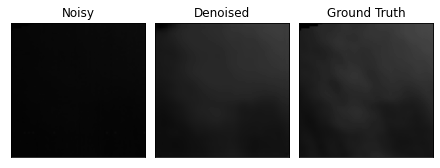

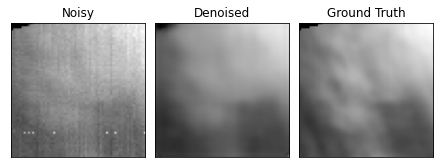

RMSE-NZ  Pred=0.0214  Noisy=0.1263 BEST
MAE-NZ   Pred=0.0192  Noisy=0.1187 BEST
PSNR     Pred=22.3 dB Noisy=6.9 dB BEST
Accuracy Pred=0.16    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.42
HOG MSE  Pred=0.04    Noisy=0.14
******************************************************
Index:64
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_2_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_2_nitid_idx134.tif


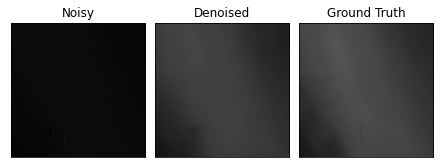

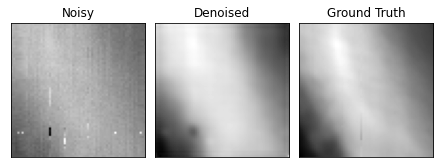

RMSE-NZ  Pred=0.0353  Noisy=0.2095 BEST
MAE-NZ   Pred=0.0339  Noisy=0.2049 BEST
PSNR     Pred=19.5 dB Noisy=4.1 dB BEST
Accuracy Pred=0.02    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.35
HOG MSE  Pred=0.02    Noisy=0.25
******************************************************
Index:65
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_3_nitid_idx134.tif


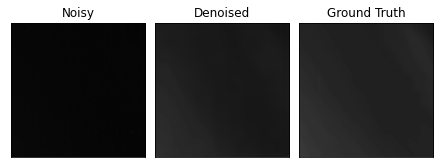

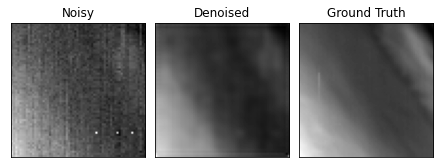

RMSE-NZ  Pred=0.0323  Noisy=0.1216 BEST
MAE-NZ   Pred=0.0315  Noisy=0.1203 BEST
PSNR     Pred=16.9 dB Noisy=5.4 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.42
HOG MSE  Pred=0.04    Noisy=0.19
******************************************************
Index:66
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_4_nitid_idx134.tif


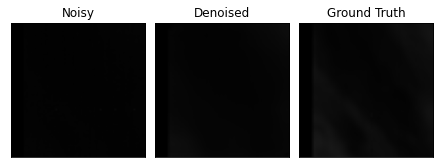

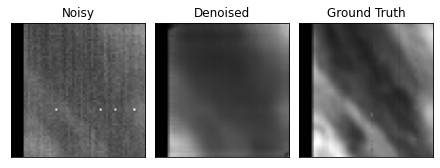

RMSE-NZ  Pred=0.0164  Noisy=0.0286 BEST
MAE-NZ   Pred=0.0125  Noisy=0.0238 BEST
PSNR     Pred=15.2 dB Noisy=10.4 dB BEST
Accuracy Pred=0.52    Noisy=0.21 BEST
SSM      Pred=0.88    Noisy=0.86
HOG MSE  Pred=0.05    Noisy=0.07
******************************************************
Index:67
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_5_nitid_idx134.tif


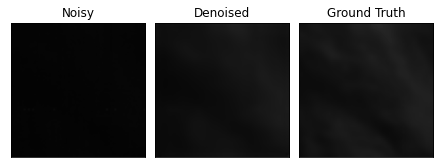

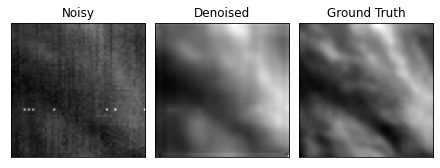

RMSE-NZ  Pred=0.0205  Noisy=0.0701 BEST
MAE-NZ   Pred=0.0189  Noisy=0.0676 BEST
PSNR     Pred=17.5 dB Noisy=6.8 dB BEST
Accuracy Pred=0.13    Noisy=0.00 BEST
SSM      Pred=0.94    Noisy=0.52
HOG MSE  Pred=0.05    Noisy=0.13
******************************************************
Index:68
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_6_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_6_nitid_idx134.tif


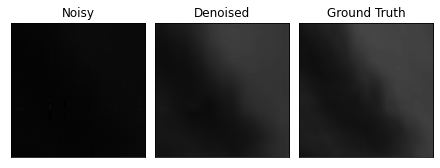

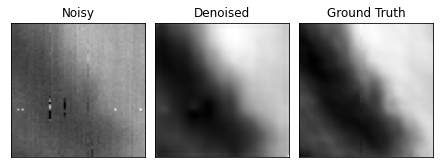

RMSE-NZ  Pred=0.0299  Noisy=0.1444 BEST
MAE-NZ   Pred=0.0275  Noisy=0.1298 BEST
PSNR     Pred=19.3 dB Noisy=5.7 dB BEST
Accuracy Pred=0.04    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.41
HOG MSE  Pred=0.05    Noisy=0.14
******************************************************
Index:69
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_7_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_7_nitid_idx134.tif


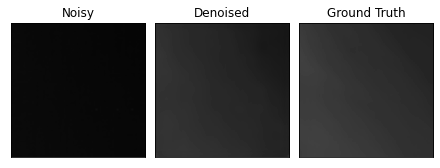

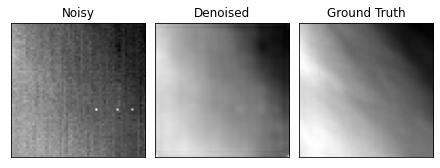

RMSE-NZ  Pred=0.0395  Noisy=0.1664 BEST
MAE-NZ   Pred=0.0391  Noisy=0.1644 BEST
PSNR     Pred=16.1 dB Noisy=3.6 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.37
HOG MSE  Pred=0.03    Noisy=0.29
******************************************************
Index:70
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_8_nitid_idx134.tif


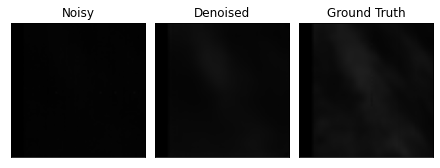

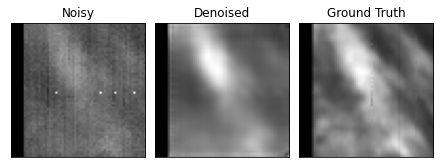

RMSE-NZ  Pred=0.0233  Noisy=0.0488 BEST
MAE-NZ   Pred=0.0196  Noisy=0.0448 BEST
PSNR     Pred=14.3 dB Noisy=7.9 dB BEST
Accuracy Pred=0.24    Noisy=0.01 BEST
SSM      Pred=0.88    Noisy=0.69
HOG MSE  Pred=0.04    Noisy=0.05
******************************************************
Index:71
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_9_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0322_04_02_9_nitid_idx134.tif


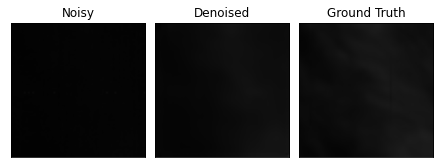

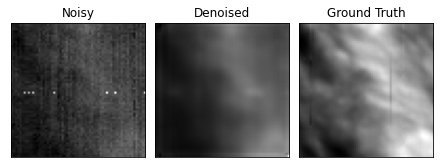

RMSE-NZ  Pred=0.0220  Noisy=0.0533 BEST
MAE-NZ   Pred=0.0207  Noisy=0.0500 BEST
PSNR     Pred=14.3 dB Noisy=6.6 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.64
HOG MSE  Pred=0.10    Noisy=0.13
******************************************************
Index:72
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_0_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_0_nitid_idx146.tif


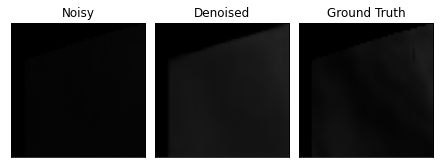

RMSE-NZ  Pred=0.0352  Noisy=0.0346 WORST
MAE-NZ   Pred=0.0299  Noisy=0.0281 WORST
PSNR     Pred=11.3 dB Noisy=11.5 dB WORST
Accuracy Pred=0.23    Noisy=0.21 BEST
SSM      Pred=0.82    Noisy=0.52
HOG MSE  Pred=0.09    Noisy=0.08
******************************************************
Index:73
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_10_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_10_nitid_idx146.tif


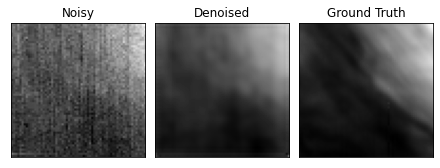

RMSE-NZ  Pred=0.0461  Noisy=0.0444 WORST
MAE-NZ   Pred=0.0441  Noisy=0.0310 WORST
PSNR     Pred=12.1 dB Noisy=12.4 dB WORST
Accuracy Pred=0.01    Noisy=0.30 WORST
SSM      Pred=0.75    Noisy=0.46
HOG MSE  Pred=0.08    Noisy=0.25
******************************************************
Index:74
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_11_nitid_idx146.tif


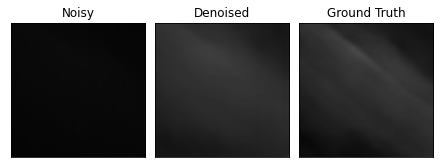

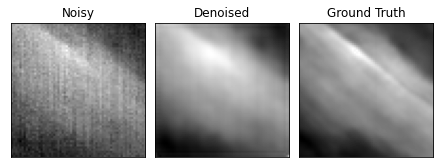

RMSE-NZ  Pred=0.0194  Noisy=0.1302 BEST
MAE-NZ   Pred=0.0163  Noisy=0.1224 BEST
PSNR     Pred=23.2 dB Noisy=6.7 dB BEST
Accuracy Pred=0.31    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.37
HOG MSE  Pred=0.06    Noisy=0.21
******************************************************
Index:75
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_12_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_12_nitid_idx146.tif


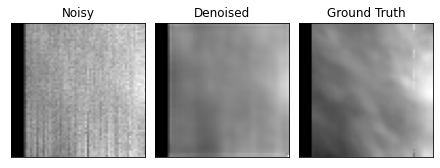

RMSE-NZ  Pred=0.0134  Noisy=0.0508 BEST
MAE-NZ   Pred=0.0109  Noisy=0.0479 BEST
PSNR     Pred=19.4 dB Noisy=7.8 dB BEST
Accuracy Pred=0.49    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.45
HOG MSE  Pred=0.04    Noisy=0.04
******************************************************
Index:76
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_13_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_13_nitid_idx146.tif


RMSE-NZ  Pred=0.0267  Noisy=0.0698 BEST
MAE-NZ   Pred=0.0221  Noisy=0.0665 BEST
PSNR     Pred=14.6 dB Noisy=6.2 dB BEST
Accuracy Pred=0.24    Noisy=0.00 BEST
SSM      Pred=0.92    Noisy=0.42
HOG MSE  Pred=0.09    Noisy=0.06
******************************************************
Index:77
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_14_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_14_nitid_idx146.tif


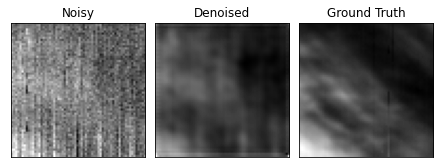

RMSE-NZ  Pred=0.0493  Noisy=0.0205 WORST
MAE-NZ   Pred=0.0483  Noisy=0.0151 WORST
PSNR     Pred=6.5 dB Noisy=14.1 dB WORST
Accuracy Pred=0.00    Noisy=0.41 WORST
SSM      Pred=0.68    Noisy=0.47
HOG MSE  Pred=0.08    Noisy=0.14
******************************************************
Index:78
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_15_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_15_nitid_idx146.tif


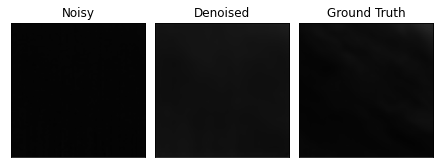

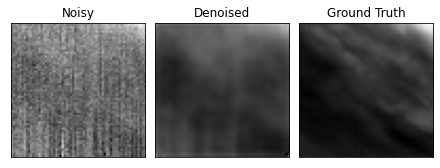

RMSE-NZ  Pred=0.0318  Noisy=0.0258 WORST
MAE-NZ   Pred=0.0304  Noisy=0.0193 WORST
PSNR     Pred=14.0 dB Noisy=15.8 dB WORST
Accuracy Pred=0.03    Noisy=0.35 WORST
SSM      Pred=0.79    Noisy=0.53
HOG MSE  Pred=0.08    Noisy=0.18
******************************************************
Index:79
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_1_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_1_nitid_idx146.tif


RMSE-NZ  Pred=0.0380  Noisy=0.0624 BEST
MAE-NZ   Pred=0.0356  Noisy=0.0573 BEST
PSNR     Pred=13.1 dB Noisy=8.8 dB BEST
Accuracy Pred=0.06    Noisy=0.01 BEST
SSM      Pred=0.88    Noisy=0.41
HOG MSE  Pred=0.05    Noisy=0.26
******************************************************
Index:80
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_2_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_2_nitid_idx146.tif


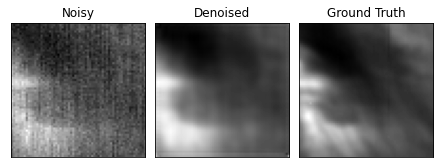

RMSE-NZ  Pred=0.0103  Noisy=0.0626 BEST
MAE-NZ   Pred=0.0081  Noisy=0.0579 BEST
PSNR     Pred=24.6 dB Noisy=9.0 dB BEST
Accuracy Pred=0.67    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.48
HOG MSE  Pred=0.05    Noisy=0.15
******************************************************
Index:81
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_3_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_3_nitid_idx146.tif


RMSE-NZ  Pred=0.0223  Noisy=0.0811 BEST
MAE-NZ   Pred=0.0199  Noisy=0.0782 BEST
PSNR     Pred=16.4 dB Noisy=5.2 dB BEST
Accuracy Pred=0.19    Noisy=0.00 BEST
SSM      Pred=0.95    Noisy=0.50
HOG MSE  Pred=0.07    Noisy=0.20
******************************************************
Index:82
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_4_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_4_nitid_idx146.tif


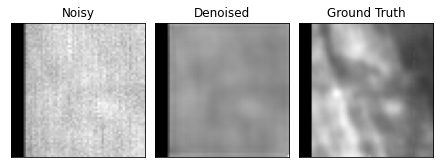

RMSE-NZ  Pred=0.0389  Noisy=0.0356 WORST
MAE-NZ   Pred=0.0346  Noisy=0.0317 WORST
PSNR     Pred=7.5 dB Noisy=8.3 dB WORST
Accuracy Pred=0.12    Noisy=0.12 BEST
SSM      Pred=0.80    Noisy=0.42
HOG MSE  Pred=0.04    Noisy=0.03
******************************************************
Index:83
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_5_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_5_nitid_idx146.tif


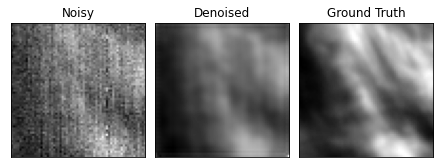

RMSE-NZ  Pred=0.0494  Noisy=0.0430 WORST
MAE-NZ   Pred=0.0486  Noisy=0.0373 WORST
PSNR     Pred=7.3 dB Noisy=8.5 dB WORST
Accuracy Pred=0.00    Noisy=0.10 WORST
SSM      Pred=0.81    Noisy=0.42
HOG MSE  Pred=0.05    Noisy=0.22
******************************************************
Index:84
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_6_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_6_nitid_idx146.tif


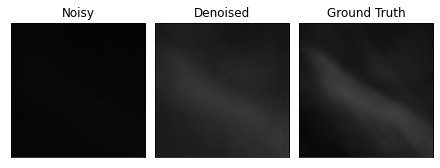

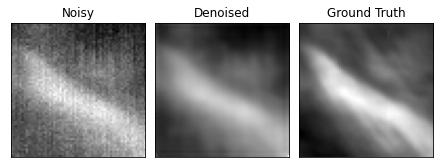

RMSE-NZ  Pred=0.0323  Noisy=0.1059 BEST
MAE-NZ   Pred=0.0271  Noisy=0.0949 BEST
PSNR     Pred=17.9 dB Noisy=7.6 dB BEST
Accuracy Pred=0.16    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.38
HOG MSE  Pred=0.04    Noisy=0.24
******************************************************
Index:85
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_7_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_7_nitid_idx146.tif


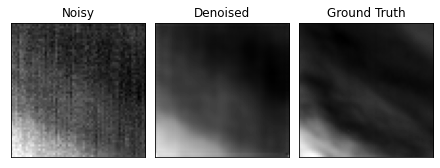

RMSE-NZ  Pred=0.0161  Noisy=0.0621 BEST
MAE-NZ   Pred=0.0131  Noisy=0.0586 BEST
PSNR     Pred=22.5 dB Noisy=10.7 dB BEST
Accuracy Pred=0.44    Noisy=0.00 BEST
SSM      Pred=0.96    Noisy=0.50
HOG MSE  Pred=0.07    Noisy=0.26
******************************************************
Index:86
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_8_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_8_nitid_idx146.tif


RMSE-NZ  Pred=0.0207  Noisy=0.0425 BEST
MAE-NZ   Pred=0.0168  Noisy=0.0409 BEST
PSNR     Pred=13.8 dB Noisy=7.5 dB BEST
Accuracy Pred=0.24    Noisy=0.03 BEST
SSM      Pred=0.92    Noisy=0.45
HOG MSE  Pred=0.02    Noisy=0.01
******************************************************
Index:87
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_9_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0323_04_03_9_nitid_idx146.tif


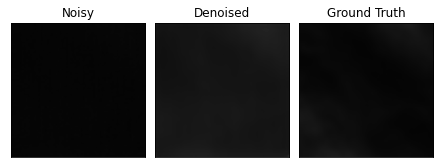

RMSE-NZ  Pred=0.0488  Noisy=0.0261 WORST
MAE-NZ   Pred=0.0473  Noisy=0.0192 WORST
PSNR     Pred=7.2 dB Noisy=12.6 dB WORST
Accuracy Pred=0.01    Noisy=0.40 WORST
SSM      Pred=0.70    Noisy=0.47
HOG MSE  Pred=0.06    Noisy=0.20
******************************************************
Index:88
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_0_nitid_idx134.tif


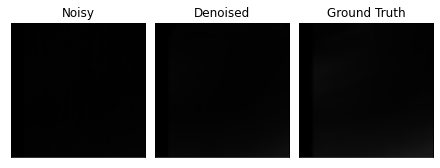

RMSE-NZ  Pred=0.0126  Noisy=0.0231 BEST
MAE-NZ   Pred=0.0100  Noisy=0.0188 BEST
PSNR     Pred=17.7 dB Noisy=12.4 dB BEST
Accuracy Pred=0.54    Noisy=0.29 BEST
SSM      Pred=0.90    Noisy=0.88
HOG MSE  Pred=0.05    Noisy=0.11
******************************************************
Index:89
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_10_nitid_idx134.tif


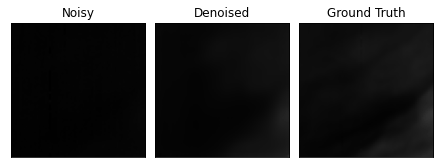

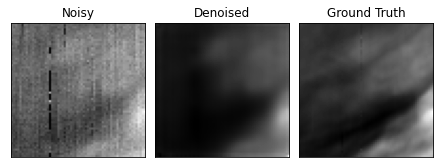

RMSE-NZ  Pred=0.0235  Noisy=0.0549 BEST
MAE-NZ   Pred=0.0211  Noisy=0.0477 BEST
PSNR     Pred=19.1 dB Noisy=11.7 dB BEST
Accuracy Pred=0.17    Noisy=0.03 BEST
SSM      Pred=0.88    Noisy=0.66
HOG MSE  Pred=0.07    Noisy=0.11
******************************************************
Index:90
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_11_nitid_idx134.tif


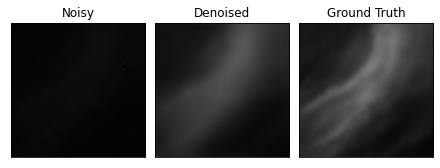

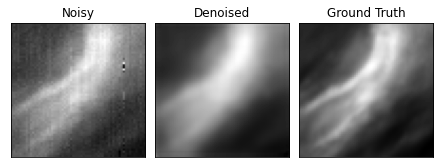

RMSE-NZ  Pred=0.0547  Noisy=0.1931 BEST
MAE-NZ   Pred=0.0444  Noisy=0.1660 BEST
PSNR     Pred=18.9 dB Noisy=8.0 dB BEST
Accuracy Pred=0.06    Noisy=0.00 BEST
SSM      Pred=0.87    Noisy=0.35
HOG MSE  Pred=0.06    Noisy=0.09
******************************************************
Index:91
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_12_nitid_idx134.tif


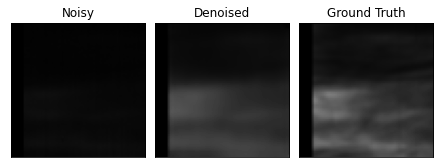

RMSE-NZ  Pred=0.0434  Noisy=0.1742 BEST
MAE-NZ   Pred=0.0298  Noisy=0.1438 BEST
PSNR     Pred=21.2 dB Noisy=9.1 dB BEST
Accuracy Pred=0.27    Noisy=0.00 BEST
SSM      Pred=0.91    Noisy=0.43
HOG MSE  Pred=0.03    Noisy=0.05
******************************************************
Index:92
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_13_nitid_idx134.tif


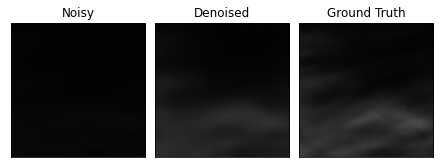

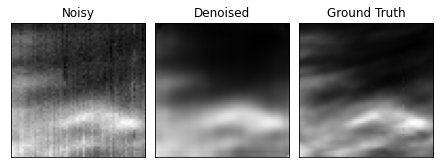

RMSE-NZ  Pred=0.0272  Noisy=0.0979 BEST
MAE-NZ   Pred=0.0212  Noisy=0.0772 BEST
PSNR     Pred=20.5 dB Noisy=9.4 dB BEST
Accuracy Pred=0.32    Noisy=0.04 BEST
SSM      Pred=0.92    Noisy=0.59
HOG MSE  Pred=0.05    Noisy=0.12
******************************************************
Index:93
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_14_nitid_idx134.tif


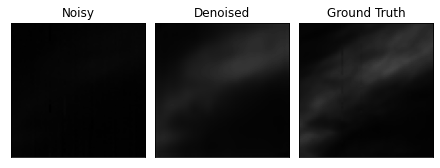

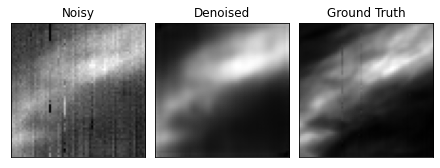

RMSE-NZ  Pred=0.0171  Noisy=0.0879 BEST
MAE-NZ   Pred=0.0122  Noisy=0.0678 BEST
PSNR     Pred=23.8 dB Noisy=9.6 dB BEST
Accuracy Pred=0.56    Noisy=0.15 BEST
SSM      Pred=0.95    Noisy=0.48
HOG MSE  Pred=0.03    Noisy=0.14
******************************************************
Index:94
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_15_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_15_nitid_idx134.tif


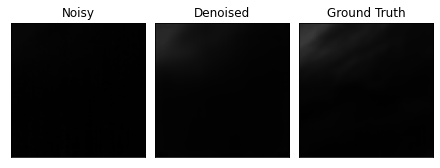

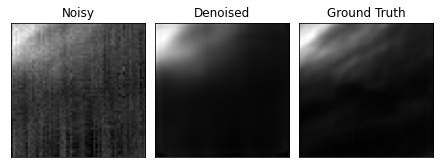

RMSE-NZ  Pred=0.0129  Noisy=0.0432 BEST
MAE-NZ   Pred=0.0079  Noisy=0.0247 BEST
PSNR     Pred=24.9 dB Noisy=14.4 dB BEST
Accuracy Pred=0.75    Noisy=0.51 BEST
SSM      Pred=0.95    Noisy=0.75
HOG MSE  Pred=0.06    Noisy=0.19
******************************************************
Index:95
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_1_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_1_nitid_idx134.tif


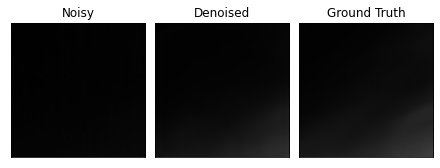

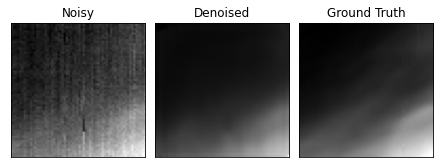

RMSE-NZ  Pred=0.0211  Noisy=0.0611 BEST
MAE-NZ   Pred=0.0179  Noisy=0.0449 BEST
PSNR     Pred=21.1 dB Noisy=11.9 dB BEST
Accuracy Pred=0.28    Noisy=0.19 BEST
SSM      Pred=0.90    Noisy=0.72
HOG MSE  Pred=0.06    Noisy=0.37
******************************************************
Index:96
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_2_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_2_nitid_idx134.tif


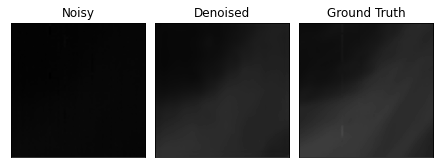

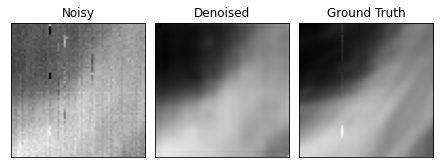

RMSE-NZ  Pred=0.0363  Noisy=0.1335 BEST
MAE-NZ   Pred=0.0347  Noisy=0.1242 BEST
PSNR     Pred=17.6 dB Noisy=6.3 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.93    Noisy=0.43
HOG MSE  Pred=0.06    Noisy=0.17
******************************************************
Index:97
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_3_nitid_idx134.tif


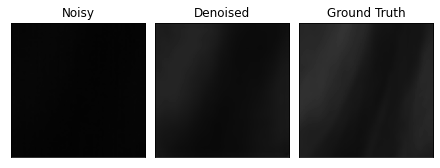

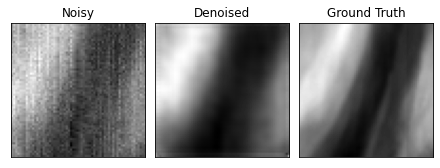

RMSE-NZ  Pred=0.0396  Noisy=0.1042 BEST
MAE-NZ   Pred=0.0381  Noisy=0.0979 BEST
PSNR     Pred=14.2 dB Noisy=5.8 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.50
HOG MSE  Pred=0.04    Noisy=0.32
******************************************************
Index:98
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_4_nitid_idx134.tif


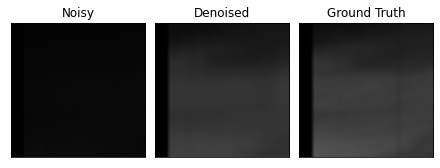

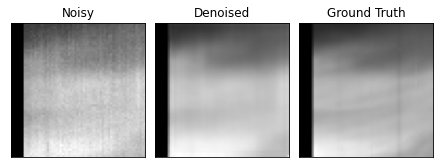

RMSE-NZ  Pred=0.0310  Noisy=0.1769 BEST
MAE-NZ   Pred=0.0274  Noisy=0.1674 BEST
PSNR     Pred=20.7 dB Noisy=5.6 dB BEST
Accuracy Pred=0.14    Noisy=0.00 BEST
SSM      Pred=0.98    Noisy=0.34
HOG MSE  Pred=0.02    Noisy=0.05
******************************************************
Index:99
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_5_nitid_idx134.tif


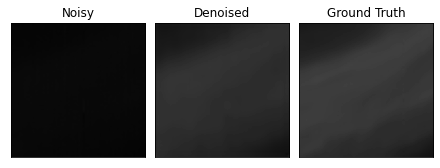

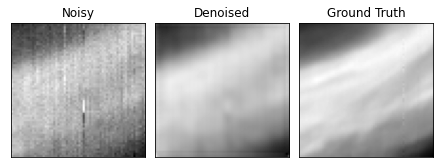

RMSE-NZ  Pred=0.0378  Noisy=0.1721 BEST
MAE-NZ   Pred=0.0366  Noisy=0.1686 BEST
PSNR     Pred=16.5 dB Noisy=3.4 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.97    Noisy=0.37
HOG MSE  Pred=0.04    Noisy=0.31
******************************************************
Index:100
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_6_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_6_nitid_idx134.tif


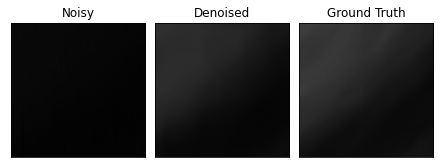

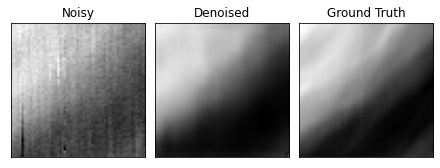

RMSE-NZ  Pred=0.0329  Noisy=0.1147 BEST
MAE-NZ   Pred=0.0313  Noisy=0.1003 BEST
PSNR     Pred=17.5 dB Noisy=6.6 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.92    Noisy=0.51
HOG MSE  Pred=0.04    Noisy=0.33
******************************************************
Index:101
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_7_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_7_nitid_idx134.tif


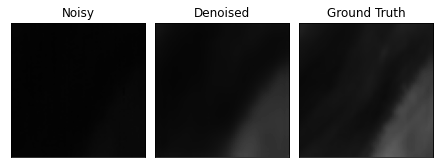

RMSE-NZ  Pred=0.0462  Noisy=0.1178 BEST
MAE-NZ   Pred=0.0409  Noisy=0.0941 BEST
PSNR     Pred=18.1 dB Noisy=10.0 dB BEST
Accuracy Pred=0.01    Noisy=0.00 BEST
SSM      Pred=0.84    Noisy=0.56
HOG MSE  Pred=0.07    Noisy=0.09
******************************************************
Index:102
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_8_nitid_idx134.tif


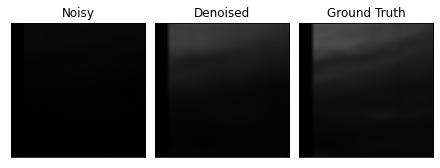

RMSE-NZ  Pred=0.0270  Noisy=0.1098 BEST
MAE-NZ   Pred=0.0231  Noisy=0.0852 BEST
PSNR     Pred=21.6 dB Noisy=9.4 dB BEST
Accuracy Pred=0.17    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.59
HOG MSE  Pred=0.02    Noisy=0.09
******************************************************
Index:103
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_9_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_01_02_9_nitid_idx134.tif


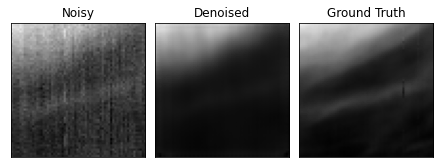

RMSE-NZ  Pred=0.0206  Noisy=0.0545 BEST
MAE-NZ   Pred=0.0191  Noisy=0.0435 BEST
PSNR     Pred=19.4 dB Noisy=11.0 dB BEST
Accuracy Pred=0.12    Noisy=0.00 BEST
SSM      Pred=0.87    Noisy=0.74
HOG MSE  Pred=0.03    Noisy=0.36
******************************************************
Index:104
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_0_nitid_idx134.tif


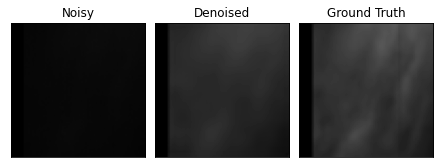

RMSE-NZ  Pred=0.0480  Noisy=0.1835 BEST
MAE-NZ   Pred=0.0429  Noisy=0.1780 BEST
PSNR     Pred=17.1 dB Noisy=5.5 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.35
HOG MSE  Pred=0.04    Noisy=0.03
******************************************************
Index:105
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_10_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_10_nitid_idx134.tif


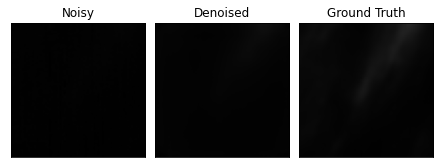

RMSE-NZ  Pred=0.0208  Noisy=0.0300 BEST
MAE-NZ   Pred=0.0146  Noisy=0.0224 BEST
PSNR     Pred=16.9 dB Noisy=13.8 dB BEST
Accuracy Pred=0.49    Noisy=0.29 BEST
SSM      Pred=0.84    Noisy=0.85
HOG MSE  Pred=0.07    Noisy=0.22
******************************************************
Index:106
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_11_nitid_idx134.tif


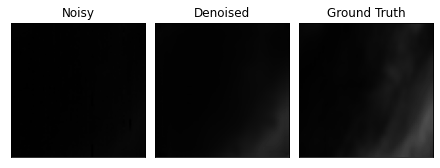

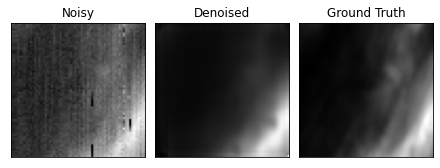

RMSE-NZ  Pred=0.0446  Noisy=0.0768 BEST
MAE-NZ   Pred=0.0324  Noisy=0.0520 BEST
PSNR     Pred=16.6 dB Noisy=11.9 dB BEST
Accuracy Pred=0.35    Noisy=0.21 BEST
SSM      Pred=0.75    Noisy=0.76
HOG MSE  Pred=0.07    Noisy=0.14
******************************************************
Index:107
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_12_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_12_nitid_idx134.tif


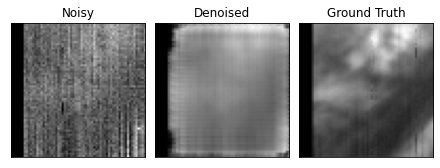

RMSE-NZ  Pred=0.0067  Noisy=0.0111 BEST
MAE-NZ   Pred=0.0047  Noisy=0.0093 BEST
PSNR     Pred=15.1 dB Noisy=10.7 dB BEST
Accuracy Pred=0.85    Noisy=0.59 BEST
SSM      Pred=0.94    Noisy=0.92
HOG MSE  Pred=0.05    Noisy=0.04
******************************************************
Index:108
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_13_nitid_idx134.tif


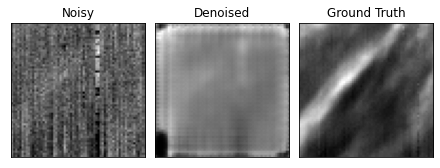

RMSE-NZ  Pred=0.0047  Noisy=0.0074 BEST
MAE-NZ   Pred=0.0032  Noisy=0.0059 BEST
PSNR     Pred=15.8 dB Noisy=11.9 dB BEST
Accuracy Pred=0.93    Noisy=0.84 BEST
SSM      Pred=0.96    Noisy=0.91
HOG MSE  Pred=0.08    Noisy=0.14
******************************************************
Index:109
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_14_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_14_nitid_idx134.tif


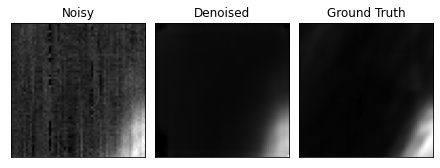

RMSE-NZ  Pred=0.0149  Noisy=0.0394 BEST
MAE-NZ   Pred=0.0065  Noisy=0.0146 BEST
PSNR     Pred=24.9 dB Noisy=16.5 dB BEST
Accuracy Pred=0.92    Noisy=0.78 BEST
SSM      Pred=0.95    Noisy=0.83
HOG MSE  Pred=0.06    Noisy=0.09
******************************************************
Index:110
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_15_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_15_nitid_idx134.tif


RMSE-NZ  Pred=0.0570  Noisy=0.1381 BEST
MAE-NZ   Pred=0.0516  Noisy=0.1241 BEST
PSNR     Pred=14.8 dB Noisy=7.1 dB BEST
Accuracy Pred=0.08    Noisy=0.01 BEST
SSM      Pred=0.80    Noisy=0.42
HOG MSE  Pred=0.05    Noisy=0.17
******************************************************
Index:111
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_1_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_1_nitid_idx134.tif


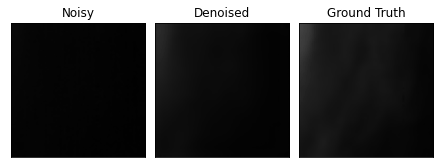

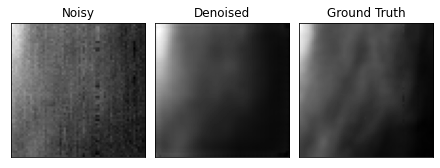

RMSE-NZ  Pred=0.0338  Noisy=0.0674 BEST
MAE-NZ   Pred=0.0310  Noisy=0.0582 BEST
PSNR     Pred=18.1 dB Noisy=12.1 dB BEST
Accuracy Pred=0.06    Noisy=0.02 BEST
SSM      Pred=0.81    Noisy=0.68
HOG MSE  Pred=0.03    Noisy=0.14
******************************************************
Index:112
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_2_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_2_nitid_idx134.tif


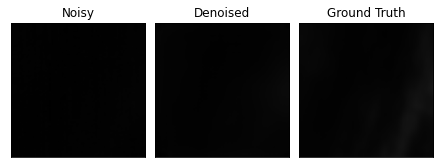

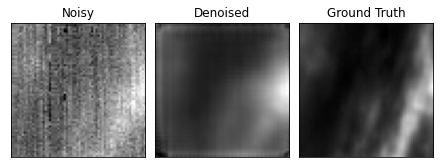

RMSE-NZ  Pred=0.0151  Noisy=0.0222 BEST
MAE-NZ   Pred=0.0102  Noisy=0.0168 BEST
PSNR     Pred=16.0 dB Noisy=12.6 dB BEST
Accuracy Pred=0.66    Noisy=0.43 BEST
SSM      Pred=0.88    Noisy=0.88
HOG MSE  Pred=0.09    Noisy=0.24
******************************************************
Index:113
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_3_nitid_idx134.tif


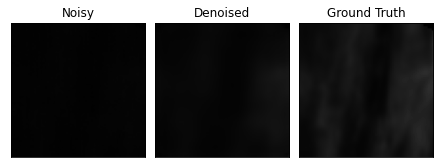

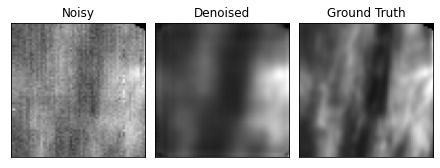

RMSE-NZ  Pred=0.0459  Noisy=0.0691 BEST
MAE-NZ   Pred=0.0411  Noisy=0.0616 BEST
PSNR     Pred=11.9 dB Noisy=8.4 dB BEST
Accuracy Pred=0.06    Noisy=0.01 BEST
SSM      Pred=0.68    Noisy=0.72
HOG MSE  Pred=0.04    Noisy=0.18
******************************************************
Index:114
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_4_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_4_nitid_idx134.tif


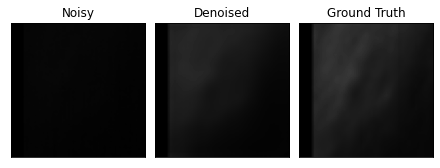

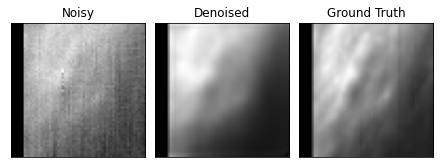

RMSE-NZ  Pred=0.0333  Noisy=0.1015 BEST
MAE-NZ   Pred=0.0300  Noisy=0.0905 BEST
PSNR     Pred=16.4 dB Noisy=6.7 dB BEST
Accuracy Pred=0.11    Noisy=0.00 BEST
SSM      Pred=0.87    Noisy=0.54
HOG MSE  Pred=0.03    Noisy=0.05
******************************************************
Index:115
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_5_nitid_idx134.tif


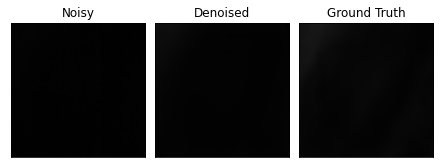

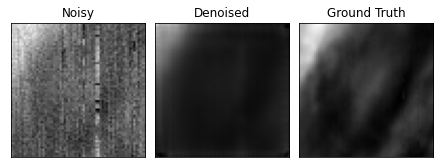

RMSE-NZ  Pred=0.0149  Noisy=0.0237 BEST
MAE-NZ   Pred=0.0124  Noisy=0.0194 BEST
PSNR     Pred=16.3 dB Noisy=12.3 dB BEST
Accuracy Pred=0.45    Noisy=0.16 BEST
SSM      Pred=0.85    Noisy=0.88
HOG MSE  Pred=0.07    Noisy=0.12
******************************************************
Index:116
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_6_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_6_nitid_idx134.tif


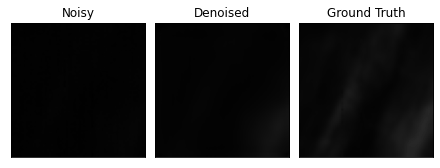

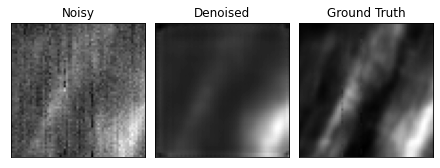

RMSE-NZ  Pred=0.0315  Noisy=0.0448 BEST
MAE-NZ   Pred=0.0264  Noisy=0.0365 BEST
PSNR     Pred=13.9 dB Noisy=10.8 dB BEST
Accuracy Pred=0.14    Noisy=0.04 BEST
SSM      Pred=0.70    Noisy=0.86
HOG MSE  Pred=0.05    Noisy=0.18
******************************************************
Index:117
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_7_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_7_nitid_idx134.tif


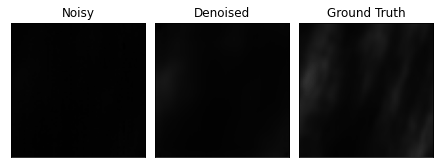

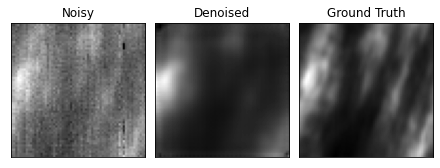

RMSE-NZ  Pred=0.0397  Noisy=0.0541 BEST
MAE-NZ   Pred=0.0337  Noisy=0.0457 BEST
PSNR     Pred=13.7 dB Noisy=11.0 dB BEST
Accuracy Pred=0.09    Noisy=0.03 BEST
SSM      Pred=0.65    Noisy=0.82
HOG MSE  Pred=0.07    Noisy=0.22
******************************************************
Index:118
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_8_nitid_idx134.tif


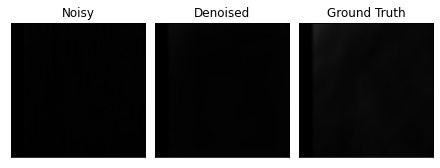

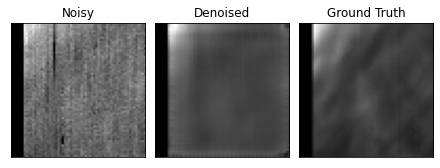

RMSE-NZ  Pred=0.0211  Noisy=0.0280 BEST
MAE-NZ   Pred=0.0182  Noisy=0.0254 BEST
PSNR     Pred=15.8 dB Noisy=13.3 dB BEST
Accuracy Pred=0.15    Noisy=0.01 BEST
SSM      Pred=0.72    Noisy=0.92
HOG MSE  Pred=0.06    Noisy=0.05
******************************************************
Index:119
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_9_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/test\VI0379_05_02_9_nitid_idx134.tif


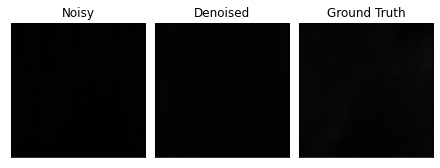

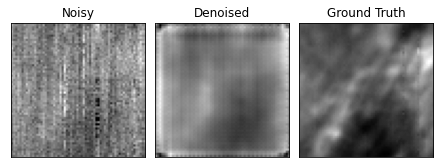

RMSE-NZ  Pred=0.0130  Noisy=0.0180 BEST
MAE-NZ   Pred=0.0116  Noisy=0.0169 BEST
PSNR     Pred=12.4 dB Noisy=9.6 dB BEST
Accuracy Pred=0.39    Noisy=0.14 BEST
SSM      Pred=0.84    Noisy=0.91
HOG MSE  Pred=0.15    Noisy=0.07
******************************************************


In [10]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )

In [11]:
model.save(os.path.abspath(os.path.join('../../../saves/', SAVED_MODEL)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0100_1000-64-unet-d2\assets
